# 03. Web Scraping from Crossref

This notebook presents an innovative approach to extract additional information from **CrossRef** by utilizing the `DOI` of the article previously acquired from **PubMed**. The script augments the existing DataFrame with two essential columns: `href`, which contains the direct link to the official article page, and `json_href`, facilitating access to the metadata from CrossRef. Leveraging the capabilities of the `selenium` framework, the script seamlessly navigates the CrossRef platform.

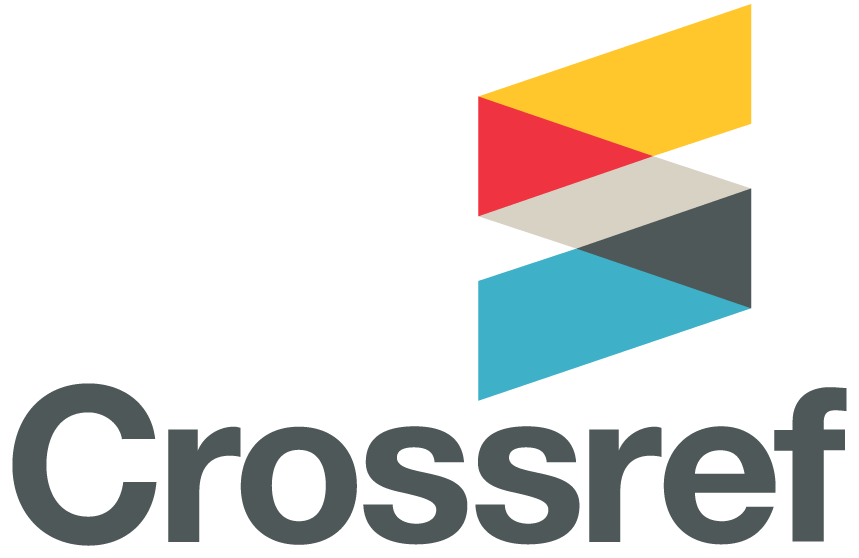

In [1]:
# Libraries Importation

import time
import pandas as pd

from tqdm.notebook import tqdm
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  

import warnings
warnings.filterwarnings('ignore')

In [3]:
articles = pd.read_csv('../data/pubmed_articles_raw.csv')

In [6]:
articles.head(2)

,DOI,title,authors,affiliations,journal,year,month,volume,first_page,last_page,PMID,PMCID,abstract
0,10.1177/17585732221102399,Surgical management of the spastic elbow,"['Weisang Luo 1 ', ' Matthew Nixon 1 2']","['Countess of Chester Hospital, Chester, UK.',...",Shoulder Elbow,2023,Oct,15(5),534,543,37811394,PMC10557929,['Background: We performed a retrospective rev...
1,10.1007/s11571-022-09871-6,Three-dimensional memristive Morris-Lecar mode...,"['Han Bao 1 ', ' Xihong Yu 1 ', ' Quan Xu 1...","[""School of Microelectronics and Control Engin...",Cogn Neurodyn,2023,Aug,17(4),1079,1092,37522038,PMC10374513,['To characterize the magnetic induction flow ...


___

In [88]:
PATH = webdriver.FirefoxOptions()
driver = webdriver.Firefox(options = PATH)

In [89]:
url = 'https://search.crossref.org/'
driver.get(url)
search_doi = driver.find_element(By.CSS_SELECTOR, '#search-input')
time.sleep(3)

In [90]:
href = []
json_href = []
error = []

for doi in tqdm(articles['DOI']):
    try:
        search_doi.clear()
        search_doi.send_keys(doi)
        search_doi.send_keys(Keys.ENTER)
        time.sleep(3)
        try:
            article_box = driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[1]/div[2]/table/tbody/tr/td')
            href.append(driver.find_element(By.CSS_SELECTOR, '.item-links > a:nth-child(1)').text)
            driver.find_element(By.CSS_SELECTOR, '.dropdown-toggle').click()
            json_href.append(driver.find_element(By.CSS_SELECTOR, '.dropdown-menu > li:nth-child(3) > a:nth-child(1)').get_attribute('href'))
            search_doi = driver.find_element(By.CSS_SELECTOR, '#search-input')
        except:
            href.append('')
            json_href.append('')
            continue
    except:
        error.append(doi)
        href.append('error')
        json_href.append('error')
        url = 'https://search.crossref.org/'
        driver.get(url)
        search_doi = driver.find_element(By.CSS_SELECTOR, '#search-input')
        time.sleep(3)
        next

  0%|          | 0/176 [00:00<?, ?it/s]

In [91]:
driver.quit()

In [94]:
cross_ref['href'] = href
cross_ref['json_href'] = json_href

In [95]:
cross_ref_df = pd.DataFrame(cross_ref)
cross_ref_df.head(2)

,href,json_href
0,https://doi.org/10.3390/ijms24065986,https://api.crossref.org/works/10.3390/ijms240...
1,https://doi.org/10.1523/jneurosci.1496-22.2023,https://api.crossref.org/works/10.1523/jneuros...


In [110]:
cross_ref_df.to_csv('../data/cross_ref', index=False)

In [111]:
errors = ['10.1016/j.ijbiomac.2022.12.030',
          '10.1021/acs.nanolett.2c02775',
          '10.1186/s12974-022-02676-8',
          '10.1002/cbin.11890',
          '10.1038/s41401-022-00871-0',
          '10.1111/ene.15388',
          '10.3390/brainsci12070945',
          '10.3389/fphar.2022.899169',
          '10.1016/j.brs.2022.04.002',
          '10.4103/1673-5374.324857',
          '10.1093/mtomcs/mfac005',
          '10.3389/fphar.2022.845930',
          '10.3390/antiox11030466',
          '10.1016/j.stem.2021.11.009',
          '10.1016/j.neuron.2021.10.019',
          '10.1177/09603271221102519',
          '10.1159/000516412',
          '10.1080/15592294.2021.1896983',
          '10.1016/j.neuro.2023.10.005',
          '10.1016/j.wneu.2023.09.065',
          '10.1080/15548627.2023.2249750',
          '10.1016/j.jns.2023.120710',
          '10.1111/nan.12897',
          '10.3390/ijms24065986''10.3389/fnhum.2023.1126510',
          '10.1080/10985549.2023.2169563',
          '10.3389/fnins.2022.1082375',
          '10.2147/JIR.S387127',
          '10.1159/000522091',
          '10.1080/17588928.2022.2084605']

In [112]:
cross_ref_errors_df = pd.DataFrame(errors)

In [113]:
cross_ref_errors_df.to_csv('../data/cross_ref_errors', index=False)